# Notebook to represent Smiles as different kinds of graph objects.


Further reading
https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/algorithms/coloring.html 

source code on the networkx Base Graph objcct
https://networkx.org/documentation/stable/_modules/networkx/classes/graph.html

### You should look at NodeView and AdjacencyView classes



another library you might want to check out
https://github.com/RobRomijnders/ssl_graph
Semi supervised learning for classification problems (on graphs)

### Dependencies  

In [1]:
%%capture 
# %%capture cell magic  makes this cell silent. 

# torch-geometric is an externsion of torch for working with graphs
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric
# pysmiles
!pip install pysmiles

# pyTDC is the Therapudic Data Commons 
!pip install PyTDC
!python -m pip install git+https://github.com/EBjerrum/molvecgen # unsure what this is.


# BROKEN
# # rdkit
# !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !chmod +x Miniconda3-latest-Linux-x86_64.sh
# !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# !time conda install -q -y -c conda-forge rdkit

#### BROKEN see if you can just not use deepchem
# deepchem and rdkit. You might not need the one above.
# %tensorflow_version 1.x
# !wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
# !chmod +x Anaconda3-2019.10-Linux-x86_64.sh
# !bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
# !conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

In [2]:
import pandas as pd
from tdc.single_pred import ADME

data = ADME(name = 'CYP2C9_Veith') # this is the binary molecule problem
df = data.get_data()
df = df[['Drug','Y']]
df['Y'].value_counts() # unbalenced dataset. 

Downloading...
100%|██████████| 740k/740k [00:00<00:00, 969kiB/s]
Loading...
Done!


0    8047
1    4045
Name: Y, dtype: int64

In [6]:
# source: https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation
from pysmiles import read_smiles
import networkx as nx
a_smile = df['Drug'][0]
mol = read_smiles(a_smile)

mol.nodes.data('element')

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


NodeDataView({0: 'C', 1: 'C', 2: 'N', 3: 'C', 4: 'O', 5: 'C', 6: 'C', 7: 'S', 8: 'C', 9: 'S', 10: 'N', 11: 'C', 12: 'C', 13: 'C', 14: 'O', 15: 'C', 16: 'C', 17: 'O', 18: 'C', 19: 'C', 20: 'C', 21: 'C', 22: 'C', 23: 'C'}, data='element')

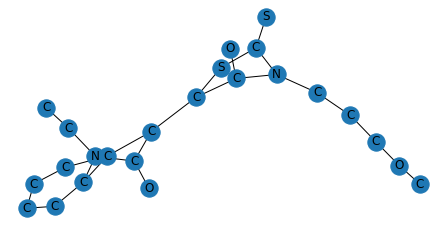

In [7]:
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

In [8]:
elements

{0: 'C',
 1: 'C',
 2: 'N',
 3: 'C',
 4: 'O',
 5: 'C',
 6: 'C',
 7: 'S',
 8: 'C',
 9: 'S',
 10: 'N',
 11: 'C',
 12: 'C',
 13: 'C',
 14: 'O',
 15: 'C',
 16: 'C',
 17: 'O',
 18: 'C',
 19: 'C',
 20: 'C',
 21: 'C',
 22: 'C',
 23: 'C'}

## Mol is a molecule as a graph object

In [11]:
mol
# you might want ot use a MultiGraph where each shared electron 
#MultiGraph—Undirected graphs with self loops and parallel edges
# https://networkx.org/documentation/stable/reference/classes/index.html#which-graph-class-should-i-use 

In [23]:
adj = mol.adj # https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.adjacency.html#networkx.Graph.adjacency 


# 'order' is a chemical property
adj

AdjacencyView({0: {1: {'order': 1}}, 1: {0: {'order': 1}, 2: {'order': 1}}, 2: {1: {'order': 1}, 3: {'order': 1}, 23: {'order': 1}}, 3: {2: {'order': 1}, 4: {'order': 2}, 5: {'order': 1}}, 4: {3: {'order': 2}}, 5: {3: {'order': 1}, 6: {'order': 2}, 18: {'order': 1}}, 6: {5: {'order': 2}, 7: {'order': 1.5}, 16: {'order': 1.5}}, 7: {6: {'order': 1.5}, 8: {'order': 1.5}}, 8: {7: {'order': 1.5}, 9: {'order': 2}, 10: {'order': 1.5}}, 9: {8: {'order': 2}}, 10: {8: {'order': 1.5}, 11: {'order': 1}, 16: {'order': 1.5}}, 11: {10: {'order': 1}, 12: {'order': 1}}, 12: {11: {'order': 1}, 13: {'order': 1}}, 13: {12: {'order': 1}, 14: {'order': 1}}, 14: {13: {'order': 1}, 15: {'order': 1}}, 15: {14: {'order': 1}}, 16: {10: {'order': 1.5}, 6: {'order': 1.5}, 17: {'order': 2}}, 17: {16: {'order': 2}}, 18: {5: {'order': 1}, 19: {'order': 1.5}, 23: {'order': 1.5}}, 19: {18: {'order': 1.5}, 20: {'order': 1.5}}, 20: {19: {'order': 1.5}, 21: {'order': 1.5}}, 21: {20: {'order': 1.5}, 22: {'order': 1.5}}, 22

In [30]:
# mol contains the node attributes and edges. 
element_key_for_a_smile = dict(mol.nodes.data('element'))
element_key_for_a_smile

{0: 'C',
 1: 'C',
 2: 'N',
 3: 'C',
 4: 'O',
 5: 'C',
 6: 'C',
 7: 'S',
 8: 'C',
 9: 'S',
 10: 'N',
 11: 'C',
 12: 'C',
 13: 'C',
 14: 'O',
 15: 'C',
 16: 'C',
 17: 'O',
 18: 'C',
 19: 'C',
 20: 'C',
 21: 'C',
 22: 'C',
 23: 'C'}

https://github.com/pckroon/pysmiles/blob/master/pysmiles/read_smiles.py

This is what each mol graph is

A graph describing a molecule. Nodes will have an 'element', 'aromatic'
        and a 'charge', and if `explicit_hydrogen` is False a 'hcount'.
        Depending on the input, they will also have 'isotope' and 'class'
        information.
        Edges will have an 'order'.

In [ ]:
mol = read_smiles(a_smile)
# each 
aromatic = mol.nodes(data='aromatic') # not sure what this is
elements = mol.nodes(data='element')
charges = mol.nodes(data='charge')
charges # unsure if chage contains any information. 

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


NodeDataView({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}, data='charge')

In [32]:
mol.order() # gets num of nodes
mol.number_of_nodes()

# these are both in the docs but they are identical is:  return len(self._node)

24

In [39]:
from networkx import Graph

# the internal representation of nodes.
mol._node

{0: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 3},
 1: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 2: {'aromatic': False, 'charge': 0, 'element': 'N', 'hcount': 0},
 3: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 4: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount': 0},
 5: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 6: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 7: {'aromatic': True, 'charge': 0, 'element': 'S', 'hcount': 0},
 8: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 9: {'aromatic': False, 'charge': 0, 'element': 'S', 'hcount': 0},
 10: {'aromatic': True, 'charge': 0, 'element': 'N', 'hcount': 0},
 11: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 12: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 13: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 14: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount'

In [44]:
mol._adj
# order is a characteristic of bonds.

{0: {1: {'order': 1}},
 1: {0: {'order': 1}, 2: {'order': 1}},
 2: {1: {'order': 1}, 3: {'order': 1}, 23: {'order': 1}},
 3: {2: {'order': 1}, 4: {'order': 2}, 5: {'order': 1}},
 4: {3: {'order': 2}},
 5: {3: {'order': 1}, 6: {'order': 2}, 18: {'order': 1}},
 6: {5: {'order': 2}, 7: {'order': 1.5}, 16: {'order': 1.5}},
 7: {6: {'order': 1.5}, 8: {'order': 1.5}},
 8: {7: {'order': 1.5}, 9: {'order': 2}, 10: {'order': 1.5}},
 9: {8: {'order': 2}},
 10: {8: {'order': 1.5}, 11: {'order': 1}, 16: {'order': 1.5}},
 11: {10: {'order': 1}, 12: {'order': 1}},
 12: {11: {'order': 1}, 13: {'order': 1}},
 13: {12: {'order': 1}, 14: {'order': 1}},
 14: {13: {'order': 1}, 15: {'order': 1}},
 15: {14: {'order': 1}},
 16: {6: {'order': 1.5}, 10: {'order': 1.5}, 17: {'order': 2}},
 17: {16: {'order': 2}},
 18: {5: {'order': 1}, 19: {'order': 1.5}, 23: {'order': 1.5}},
 19: {18: {'order': 1.5}, 20: {'order': 1.5}},
 20: {19: {'order': 1.5}, 21: {'order': 1.5}},
 21: {20: {'order': 1.5}, 22: {'order': 1.

### Factories inside of the Graph Class
self.graph_attr_dict_factory = self.graph_attr_dict_factory

self.node_dict_factory = self.node_dict_factory

self.node_attr_dict_factory = self.node_attr_dict_factory

self.adjlist_outer_dict_factory = self.adjlist_outer_dict_factory

self.adjlist_inner_dict_factory = self.adjlist_inner_dict_factory

self.edge_attr_dict_factory = self.edge_attr_dict_factory

source: https://networkx.org/documentation/stable/_modules/networkx/classes/graph.html#Graph.number_of_nodes

In [53]:
### Look at some of the factories

fac = mol.node_attr_dict_factory
# it looks like these factories are dict object with no contents.
fac

dict

In [54]:
mol.graph # empty dict

{}

In [95]:
# add a super node, a node that is connected to each node with an undiricted, attribured

super_mol = mol.copy() # default is a deep copy


### Do a Node embedding on a hypotheical node that is connected to every node. 

That embedding is the embedding of the whole graph

In [111]:
# add a new node 
# use the .update method since I assume it will be faster.
super_mol = mol.copy()
super_nodes = list(super_mol.nodes())
super_mol.add_node(-1) # the super node is always -1 since else it is 0 indexed
# now connect the node with key -1 to every node. 
edge_set = [(-1,node) for node in super_nodes]

super_mol.add_edges_from(edge_set)


# elements == dict(super_mol.nodes.data('element'))


In [91]:
super_mol.nodes.data('element')

NodeDataView({0: 'C', 1: 'C', 2: 'N', 3: 'C', 4: 'O', 5: 'C', 6: 'C', 7: 'S', 8: 'C', 9: 'S', 10: 'N', 11: 'C', 12: 'C', 13: 'C', 14: 'O', 15: 'C', 16: 'C', 17: 'O', 18: 'C', 19: 'C', 20: 'C', 21: 'C', 22: 'C', 23: 'C', -1: None}, data='element')

### Viz of the node once you added a hypotheical node that is connected to each node. 

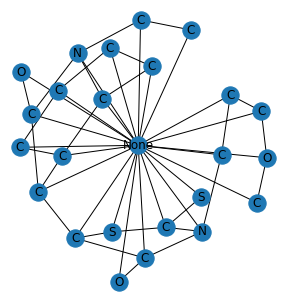

In [98]:
elements = dict(super_mol.nodes.data('element'))
nx.draw(super_mol, with_labels=True, labels = elements, pos=nx.spring_layout(super_mol))
plt.gca().set_aspect('equal')

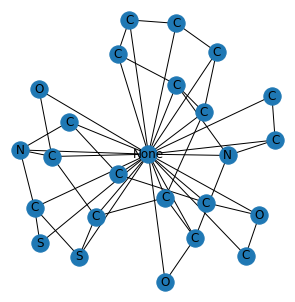

In [106]:
# generic method to return a copy of the node with a SuperNode

def add_super_node(G: nx.classes.graph.Graph):
  """
    Deep copy and as a node with index -1 that has an undiricted edge with no attributes to each node in the remaining node.

    Parameters:
      G: nx.Graph 

    Returns:
      G_with_super_node: nx.Graph 
  """

  SUPER_NODE_KEY = -1
  G_with_super_node = G.copy() # deep copy
  nodes_to_connect = list(G.nodes())
  G_with_super_node.add_node(-1) # the super node is always -1 since else it is 0 indexed

  # now connect the node with key -1 to every node. 
  edge_set = [(SUPER_NODE_KEY, node) for node in nodes_to_connect]
  G_with_super_node.add_edges_from(edge_set)

  return G_with_super_node



super_mol2 = add_super_node(mol)

elements = dict(super_mol2.nodes.data('element'))
nx.draw(super_mol2, with_labels=True, labels = elements, pos=nx.spring_layout(super_mol))
plt.gca().set_aspect('equal')

In [114]:
#verify that the method works
print(super_mol2.nodes() == super_mol.nodes())
print(super_mol2.edges() == super_mol.edges())


True
True


## Node Random Walk Embedding

Random walk embedding aims to embed a node in a feature space such that the distance between the embeddings of nodes `A_as_vector` and `B_as_vector` have a *distance* equal to some *similarity* measurement between nodes `A_as_node` and `BA_as_node`.
 
You can choose what distance and similarity mean. 

Distance is often dot-product. 

Similarity is often Jaccard Similarity.

The Encoder is a learned model that you train on your data. 

[PowerPoint that explains this in more detail](http://snap.stanford.edu/proj/embeddings-www/files/nrltutorial-part1-embeddings.pdf)

In [115]:
!pip install grakel
# https://github.com/ysig/GraKeL

     |████████████████████████████████| 1.6MB 16.3MB/s 
     |████████████████████████████████| 163kB 49.1MB/s 


E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded


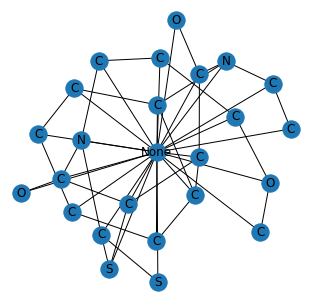

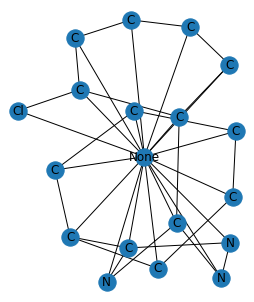

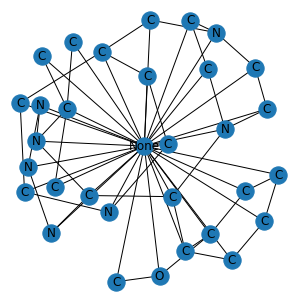

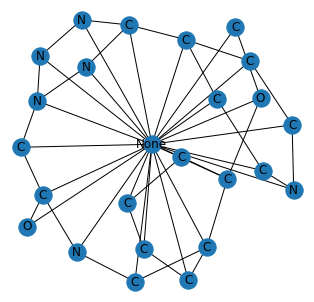

<Figure size 432x288 with 0 Axes>

In [157]:
import time
smile_subset = list(df.Drug)[:100]
target_subset = list(df.Y)[:100]
graph_subset = [read_smiles(s) for s in smile_subset]
graph_with_super_nodes = [add_super_node(G) for G in graph_subset]


# the nodes are really different
for i in range(4):
  elements = dict(graph_with_super_nodes[i].nodes.data('element'))
  nx.draw(graph_with_super_nodes[i], with_labels=True, labels = elements, pos=nx.spring_layout(graph_with_super_nodes[i]))
  plt.gca().set_aspect('equal')
  plt.show()
  time.sleep(1)
  plt.clf()

In [160]:
# https://ysig.github.io/GraKeL/0.1a7/generated/grakel.RandomWalk.html

# found a guide on what I am doing

#https://maelfabien.github.io/machinelearning/graph_5/#node-embedding 
# I think this works with Graph Objects. 
from grakel import RandomWalk
# there is also a RandomWalkLabeled Class https://ysig.github.io/GraKeL/0.1a7/generated/grakel.RandomWalkLabeled.html

walk = RandomWalk()
embedding_subset = walk.fit_transform(graph_subset)
embedding_subset



# I don't why I am getting this error

TypeError: ignored

# Graph to Kernel Methods
















a 

In [ ]:
!pip install grakel
# https://github.com/ysig/GraKeL

     |████████████████████████████████| 1.6MB 4.3MB/s 
     |████████████████████████████████| 163kB 39.4MB/s 


In [ ]:
from grakel.datasets import fetch_dataset
# source: https://ysig.github.io/GraKeL/0.1a8/documentation/introduction.html#performing-graph-classification
# just copy pasted
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target


# the elements of G are a 

In [ ]:
print(G[0][0]) # this is a set of links
print(type(G[0][0]))
print(G[0][1]) # this is a dictionary of NODE attributes
print(type(G[0][1]))
print(G[0][2]) # this is a dictionary of Edge Attributes
print(type(G[0][2]))

{(15, 13), (10, 11), (5, 6), (9, 8), (2, 1), (14, 13), (8, 9), (15, 16), (1, 6), (14, 9), (17, 15), (1, 2), (11, 10), (13, 12), (12, 13), (16, 15), (3, 4), (10, 9), (4, 10), (3, 2), (5, 4), (9, 14), (10, 4), (4, 5), (13, 15), (9, 10), (7, 5), (2, 3), (8, 7), (12, 11), (11, 12), (6, 5), (15, 17), (13, 14), (6, 1), (5, 7), (4, 3), (7, 8)}
<class 'set'>
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 2, 17: 2}
<class 'dict'>
{(2, 1): 0, (1, 2): 0, (3, 2): 0, (2, 3): 0, (4, 3): 0, (3, 4): 0, (5, 4): 0, (4, 5): 0, (6, 5): 0, (5, 6): 0, (6, 1): 0, (1, 6): 0, (7, 5): 0, (5, 7): 0, (8, 7): 0, (7, 8): 0, (9, 8): 0, (8, 9): 0, (10, 9): 0, (9, 10): 0, (10, 4): 0, (4, 10): 0, (11, 10): 0, (10, 11): 0, (12, 11): 0, (11, 12): 0, (13, 12): 0, (12, 13): 0, (14, 13): 0, (13, 14): 0, (14, 9): 0, (9, 14): 0, (15, 13): 1, (13, 15): 1, (16, 15): 2, (15, 16): 2, (17, 15): 1, (15, 17): 1}
<class 'dict'>


### In order to use the grakel Transformer you need

1. A set of edges
2. A dict of node attributes
3. A dict of edge attribures

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)
y # just an array of targets. 

array([ 1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1])

In [ ]:
K_train = wl_kernel.fit_transform(G_train)
print(K_train[0])
K_train.shape

[1.         0.73435802 0.73903538 0.67580622 0.72547625 0.67275093
 0.70682936 0.59217719 0.72525546 0.7243685  0.72492295 0.65005079
 0.71694145 0.64528535 0.63293787 0.61975118 0.64528535 0.73314905
 0.53062138 0.65565787 0.64290332 0.673636   0.62005816 0.63496323
 0.75996853 0.64635961 0.64528535 0.6360431  0.7252622  0.69552204
 0.71304817 0.81481481 0.63577527 0.73873571 0.67930409 0.73695553
 0.64664401 0.66910804 0.57389483 0.66559918 0.64281112 0.64549722
 0.65406548 0.69334428 0.66240091 0.65144663 0.66358173 0.71647794
 0.63915558 0.64684623 0.67179409 0.64549722 0.72586064 0.68333333
 0.72361644 0.65716018 0.68188405 0.70287476 0.65327458 0.72009521
 0.64664401 0.56444501 0.69501844 0.6292464  0.68569607 0.66712438
 0.65144663 0.63870856 0.63745526 0.73914469 0.6379134  0.70060375
 0.65366536 0.6438003  0.65983589 0.66209727 0.70833333 0.63836029
 0.70278193 0.75       0.72009521 0.70712009 0.67536049 0.65366536
 0.56699487 0.58327912 0.70608667 0.64332523 0.63788795 0.6491

(169, 169)

In [ ]:
K_test = wl_kernel.transform(G_test)
K_test.shape # this is an array of the kernal of each graph

(19, 169)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
SVC(kernel='precomputed')

y_pred = clf.predict(K_test)

In [ ]:
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1])

In [ ]:
from sklearn.metrics import accuracy_score
print("%2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))

84.00 %


In [ ]:
import scipy as sp

In [ ]:
G =read_smiles(a_smile)

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


In [ ]:
node_data = dict(G.nodes(data=True))
node_data

{0: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 3},
 1: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 2: {'aromatic': False, 'charge': 0, 'element': 'N', 'hcount': 0},
 3: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 4: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount': 0},
 5: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 6: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 7: {'aromatic': True, 'charge': 0, 'element': 'S', 'hcount': 0},
 8: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 9: {'aromatic': False, 'charge': 0, 'element': 'S', 'hcount': 0},
 10: {'aromatic': True, 'charge': 0, 'element': 'N', 'hcount': 0},
 11: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 12: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 13: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 14: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount'

In [ ]:
edge_data = G.edges(data=True)
list(edge_data)

[(0, 1, {'order': 1}),
 (1, 2, {'order': 1}),
 (2, 3, {'order': 1}),
 (2, 23, {'order': 1}),
 (3, 4, {'order': 2}),
 (3, 5, {'order': 1}),
 (5, 6, {'order': 2}),
 (5, 18, {'order': 1}),
 (6, 7, {'order': 1.5}),
 (6, 16, {'order': 1.5}),
 (7, 8, {'order': 1.5}),
 (8, 9, {'order': 2}),
 (8, 10, {'order': 1.5}),
 (10, 11, {'order': 1}),
 (10, 16, {'order': 1.5}),
 (11, 12, {'order': 1}),
 (12, 13, {'order': 1}),
 (13, 14, {'order': 1}),
 (14, 15, {'order': 1}),
 (16, 17, {'order': 2}),
 (18, 19, {'order': 1.5}),
 (18, 23, {'order': 1.5}),
 (19, 20, {'order': 1.5}),
 (20, 21, {'order': 1.5}),
 (21, 22, {'order': 1.5}),
 (22, 23, {'order': 1.5})]

In [ ]:
mol_edges = set(mol.edges)
mol_node_attributes = dict(mol.nodes(data='charge')) #simple version use data=True to get more node attribues
mol_edge_attributes = {edge: 0 for edge in mol_edges}

mol_for_kernel = [mol_edges, mol_node_attributes,mol_edge_attributes] # use this for kernel transformation
mol_for_kernel;

In [ ]:

print(mol_for_kernel[0])
print(G[0])

{(10, 11), (22, 23), (5, 6), (8, 9), (18, 19), (1, 2), (16, 17), (18, 23), (6, 7), (12, 13), (20, 21), (5, 18), (8, 10), (2, 23), (3, 4), (2, 3), (14, 15), (11, 12), (19, 20), (3, 5), (0, 1), (13, 14), (10, 16), (21, 22), (7, 8), (6, 16)}
{1: {'order': 1}}


In [ ]:
print(G[0][1])
print(mol_for_kernel[1])
type(G[0][1]) == type(mol_for_kernel[1])

{'order': 1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}


True

In [ ]:
# kernal_of_mol = wl_kernel.fit_transform(mol_for_kernel)
# you need lots of molecules to get kernels
def convert_list_of_smiles_to_mols(smiles_list):
  mols =[]

  for s in smiles_list:
    a_mol = read_smiles(smiles=s)
    mol_edges = set(a_mol.edges)
    mol_node_attributes = dict(a_mol.nodes(data='element')) #simple version use data=True to get more node attribues
    mol_edge_attributes = {edge: 0 for edge in mol_edges}
    mol_for_kernel = [mol_edges, mol_node_attributes,mol_edge_attributes] # use this for kernel transformation
    mols.append(mol_for_kernel)

  return mols


In [ ]:
%%capture
smiles = list(df.Drug)[:1000]# Only do first 1000 out of 12,000 for speed
mols = convert_list_of_smiles_to_mols(smiles);
len(mols);

# you now have 100 graphs of the mols in pyTDC 

In [ ]:
G_train, G_test, y_train, y_test = train_test_split(mols, list(df.Y)[:1000], test_size=0.2, random_state=42)
print(len(G_train))
print(len(G_test))
print(len(y_train))
print(len(y_test))


800
200
800
200


In [ ]:
py_tdc_kernel =  WeisfeilerLehman(n_iter=5, normalize=False, base_graph_kernel=VertexHistogram)

train_kernels  = py_tdc_kernel.fit_transform(G_train) # train the kernal encoder on the training dataset

test_kernels = py_tdc_kernel.transform(G_test) # transform the unseed graphs without changing the encoder. 

In [ ]:
# generic model with no tuning

clf = SVC(kernel='precomputed')
clf.fit(train_kernels, y_train)
SVC(kernel='precomputed')
y_test_pred = clf.predict(test_kernels)

In [ ]:
from sklearn.metrics import average_precision_score ### You only care about true and false positives. often used for uneven datasets.

score = average_precision_score(y_test,y_test_pred)

### you are evaluated on AUPRC score. The score to beat is .713

print('AUPRC is:')
round(score,4)

AUPRC is:


0.4618

In [ ]:
# try doing onely a 2-3 hop adjency matrix for each node to get freqent subgraphs. 
# try to do it in reasuable components.





Graph Embedding

How am I going to represent a graph as a vector?


Dummy: Normalized frequency count of elements -> passed into some simpel model, maybe a random forest This is the point of comparison that other models are compared to.

Color Refinement, with different elements starting as different prime numbers.
Unclear if colors should be as sum or as product.
Manual Feature engineering. 
Fast, Variable sized representation.
Machine Learning with Graphs 2.X See lecture 2.2 
Deep Walk on virtual “super” (connected to all the nodes) nodes as node embedding.
Anonymous Walk Embeddings Machine Learning With Graphs 3.X. See lecture 3.3 
Much higher computational cost, can have variable sized Can use map-reduce to speed up
Variable dimension size. I think 6k features is a reasonable guess for the graph representation.

I don’t want to do more than 3 different approaches to embedding. In order of complexity.


Model Type: 
What kind of final model will you use for classification? 

Simple models, using Lazy Predict
Some kind of traditional NN on the reasonable sized Feature Vectors
Some kind of CNN for the very large Feature Vectors.












If the distances between the vectors are small, then you can do clustering. 

Predictive powers make more sense than correlation metric. More non linear than linear. 

!pip install predicted power score. When the score is close to 0 it is non linear. If the score is far from zero .5 or .7 then it is non linear. 

Try simple linear models first and then see 

you need to document all of the results of your models. Metrics as well. 

Make a table of all the different mo

Pycaret pip when you have lots of features. It is a way to automate lots of different models. 

Flask in python for API. For storing the models. You can store them as a Blob, inside a sql database. 

		Blob storage.






